In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(15.438215370747372, -23.89207099885445),
 (-83.90333058032236, 22.7578664910331),
 (5.149121144021251, 53.293077681853646),
 (-3.833128097093109, -79.05711277122309),
 (11.367839030334721, 55.67575716948255),
 (-58.66577693530894, 147.45025916019335),
 (-47.362711228357234, -178.0023659766554),
 (-31.280511960351838, -149.20522566185633),
 (-5.013900681344808, -160.3963806717928),
 (-56.221704536993116, -162.36800604048707),
 (-23.770471042826088, 179.2546172586629),
 (-57.80240433784196, -5.462766581297615),
 (2.0304756732025027, -103.9245126329155),
 (21.772077760655947, -63.65879926060356),
 (-38.77132959788792, 28.269826926463537),
 (-48.927029324554354, 116.77795264473605),
 (-45.727606846226095, -104.05365527796667),
 (5.499969857180886, 133.21904678514488),
 (69.086206474861, 138.924400544398),
 (58.70435387355445, -178.75917405046783),
 (-61.56685325071801, -107.83104860639413),
 (42.02582548319296, 132.98943875181868),
 (-12.451140139474006, -174.26819801713071),
 (29.681932

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [16]:
#check the version of request in Jupyter Notebook
import requests
requests.__version__

'2.25.1'

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the API key.
from config import weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 20 of Set 13 | cidreira
Processing Record 21 of Set 13 | hobart
Processing Record 22 of Set 13 | punta arenas
Processing Record 23 of Set 13 | aklavik
Processing Record 24 of Set 13 | tezu
Processing Record 25 of Set 13 | malinyi
Processing Record 26 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 13 | hami
Processing Record 28 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 29 of Set 13 | rzhev
Processing Record 30 of Set 13 | nikolskoye
Processing Record 31 of Set 13 | rikitea
Processing Record 32 of Set 13 | tiksi
Processing Record 33 of Set 13 | bengkulu
Processing Record 34 of Set 13 | ushuaia
Processing Record 35 of Set 13 | solnechnyy
Processing Record 36 of Set 13 | jinxiang
Processing Record 37 of Set 13 | dubbo
Processing Record 38 of Set 13 | bluff
Processing Record 39 of Set 13 | khatanga
Processing Record 40 of Set 13 | victoria
Processing Record 41 of Set 13 | vaini
Processing Record 42 of

Processing Record 31 of Set 16 | porto de moz
Processing Record 32 of Set 16 | poya
Processing Record 33 of Set 16 | mount gambier
Processing Record 34 of Set 16 | san carlos de bariloche
Processing Record 35 of Set 16 | kuznechnoye
Processing Record 36 of Set 16 | lastoursville
Processing Record 37 of Set 16 | qaanaaq
Processing Record 38 of Set 16 | ngunguru
Processing Record 39 of Set 16 | hearst
Processing Record 40 of Set 16 | columbus
Processing Record 41 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 16 | tabora
Processing Record 43 of Set 16 | skelmorlie
Processing Record 44 of Set 16 | nanortalik
Processing Record 45 of Set 16 | nome
Processing Record 46 of Set 16 | eyl
Processing Record 47 of Set 16 | gawler
Processing Record 48 of Set 16 | kalmar
Processing Record 49 of Set 16 | tazovskiy
Processing Record 50 of Set 16 | saint combs
City not found. Skipping...
Processing Record 1 of Set 17 | kyra
Processing Record 2 of Set 17 | roros
Processing R

Processing Record 22 of Set 20 | saint-joseph
Processing Record 23 of Set 20 | zavallya
Processing Record 24 of Set 20 | artyk
City not found. Skipping...
Processing Record 25 of Set 20 | kalamazoo
Processing Record 26 of Set 20 | sambava
Processing Record 27 of Set 20 | tilichiki
Processing Record 28 of Set 20 | omsukchan
Processing Record 29 of Set 20 | beruwala
Processing Record 30 of Set 20 | faanui
Processing Record 31 of Set 20 | lata
Processing Record 32 of Set 20 | rio grande
Processing Record 33 of Set 20 | meulaboh
Processing Record 34 of Set 20 | sonqor
Processing Record 35 of Set 20 | udachnyy
Processing Record 36 of Set 20 | yumen
Processing Record 37 of Set 20 | neustadt
Processing Record 38 of Set 20 | hopewell
Processing Record 39 of Set 20 | samarai
Processing Record 40 of Set 20 | biltine
Processing Record 41 of Set 20 | saint george
Processing Record 42 of Set 20 | peniche
Processing Record 43 of Set 20 | svecha
Processing Record 44 of Set 20 | odweyne
Processing Rec

Processing Record 10 of Set 24 | shirokiy
Processing Record 11 of Set 24 | winslow
Processing Record 12 of Set 24 | chernolesskoye
Processing Record 13 of Set 24 | roald
Processing Record 14 of Set 24 | nouakchott
Processing Record 15 of Set 24 | arkhipo-osipovka
Processing Record 16 of Set 24 | gizo
Processing Record 17 of Set 24 | havre-saint-pierre
Processing Record 18 of Set 24 | sobolevo
Processing Record 19 of Set 24 | wellington
Processing Record 20 of Set 24 | altamira
Processing Record 21 of Set 24 | saint-augustin
Processing Record 22 of Set 24 | ocampo
Processing Record 23 of Set 24 | dodola
Processing Record 24 of Set 24 | umea
Processing Record 25 of Set 24 | erenhot
Processing Record 26 of Set 24 | olafsvik
Processing Record 27 of Set 24 | naranjal
Processing Record 28 of Set 24 | sao jose da coroa grande
Processing Record 29 of Set 24 | cangucu
Processing Record 30 of Set 24 | toora-khem
Processing Record 31 of Set 24 | neyshabur
Processing Record 32 of Set 24 | kencong


In [14]:
len(city_data)

572

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
#city_data_df.columns

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,72.73,58,32,15.61,BR,2021-11-23 17:12:29
1,Hobart,-42.8794,147.3294,60.66,84,100,5.75,AU,2021-11-23 17:12:29
2,Punta Arenas,-53.1500,-70.9167,53.71,62,40,25.32,CL,2021-11-23 17:12:29
3,Aklavik,68.2191,-135.0107,-12.84,96,100,9.66,CA,2021-11-23 17:12:30
4,Tezu,27.9167,96.1667,61.70,83,40,4.56,IN,2021-11-23 17:12:30
5,Malinyi,-8.9333,36.1333,86.38,37,9,5.64,TZ,2021-11-23 17:12:31
6,Hami,42.8000,93.4500,26.89,63,53,2.15,CN,2021-11-23 17:12:31
7,Rzhev,56.2624,34.3282,24.66,58,31,6.85,RU,2021-11-23 17:12:32
8,Nikolskoye,59.7035,30.7861,32.88,83,33,5.41,RU,2021-11-23 17:12:32
9,Rikitea,-23.1203,-134.9692,76.01,81,2,14.07,PF,2021-11-23 17:08:27


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2021-11-23 17:12:29,-30.1811,-50.2056,72.73,58,32,15.61
1,Hobart,AU,2021-11-23 17:12:29,-42.8794,147.3294,60.66,84,100,5.75
2,Punta Arenas,CL,2021-11-23 17:12:29,-53.1500,-70.9167,53.71,62,40,25.32
3,Aklavik,CA,2021-11-23 17:12:30,68.2191,-135.0107,-12.84,96,100,9.66
4,Tezu,IN,2021-11-23 17:12:30,27.9167,96.1667,61.70,83,40,4.56
...,...,...,...,...,...,...,...,...,...
567,Saint-Tite,CA,2021-11-23 17:28:00,46.7334,-72.5658,26.38,54,32,11.16
568,Jatiroto,ID,2021-11-23 17:28:01,-7.8833,111.1167,75.20,90,100,1.95
569,Novoagansk,RU,2021-11-23 17:28:01,61.9449,76.6625,14.45,92,100,9.19
570,Pimentel,PE,2021-11-23 17:28:02,-6.8367,-79.9342,73.69,60,0,16.11


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

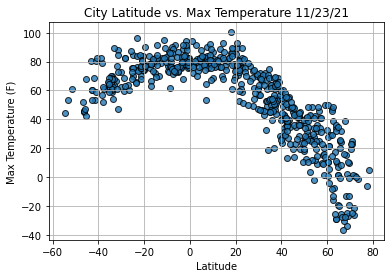

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

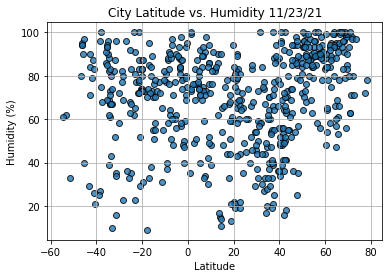

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

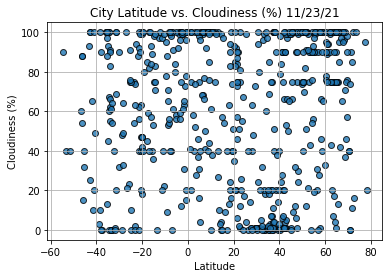

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

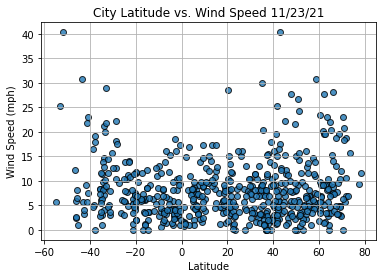

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()